In [1]:
import sys
sys.path.append("../../../")

from modules.acquire_data import DataAcquire
from modules.analyze_data import analyze_data
from modules.create_model import create_model

da = DataAcquire()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import japanize_matplotlib
import matplotlib.pyplot as plt

In [3]:
df_train = da.get_data_and_columns("Train")
df_test = da.get_data_and_columns("Test")

DATA ACQUIRE:COMPLETE

COLUMNS
----------------------------------------
COLUMN :  D-TYPE :  #NANS
id : int64 : 0 nans
Podcast_Name : object : 0 nans
Episode_Title : object : 0 nans
Episode_Length_minutes : float64 : 87093 nans
Genre : object : 0 nans
Host_Popularity_percentage : float64 : 0 nans
Publication_Day : object : 0 nans
Publication_Time : object : 0 nans
Guest_Popularity_percentage : float64 : 146030 nans
Number_of_Ads : float64 : 1 nans
Episode_Sentiment : object : 0 nans
Listening_Time_minutes : float64 : 0 nans

DATA ACQUIRE:COMPLETE

COLUMNS
----------------------------------------
COLUMN :  D-TYPE :  #NANS
id : int64 : 0 nans
Podcast_Name : object : 0 nans
Episode_Title : object : 0 nans
Episode_Length_minutes : float64 : 28736 nans
Genre : object : 0 nans
Host_Popularity_percentage : float64 : 0 nans
Publication_Day : object : 0 nans
Publication_Time : object : 0 nans
Guest_Popularity_percentage : float64 : 48832 nans
Number_of_Ads : float64 : 0 nans
Episode_Sentiment : 

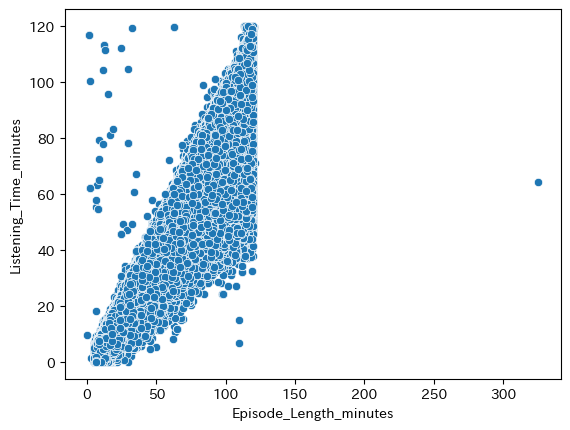

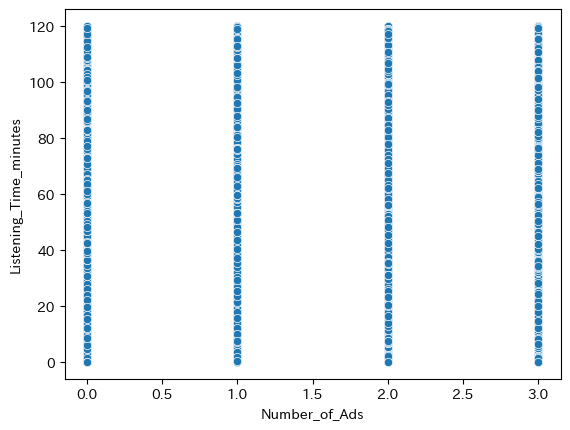

In [4]:
def scatter(colx, coly, df):
    sns.scatterplot(x=colx, y=coly, data=df)
    plt.show()

scatter('Episode_Length_minutes', 'Listening_Time_minutes', df_train)
scatter('Number_of_Ads', 'Listening_Time_minutes', df_train.query('Number_of_Ads < 10'))

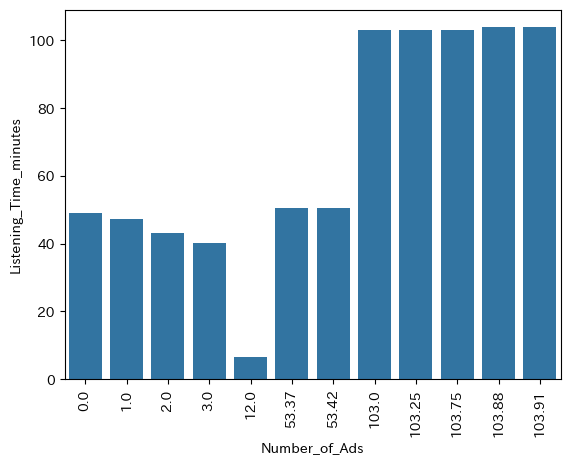

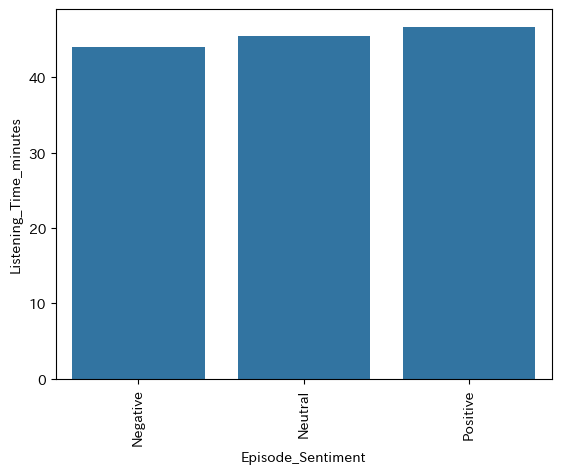

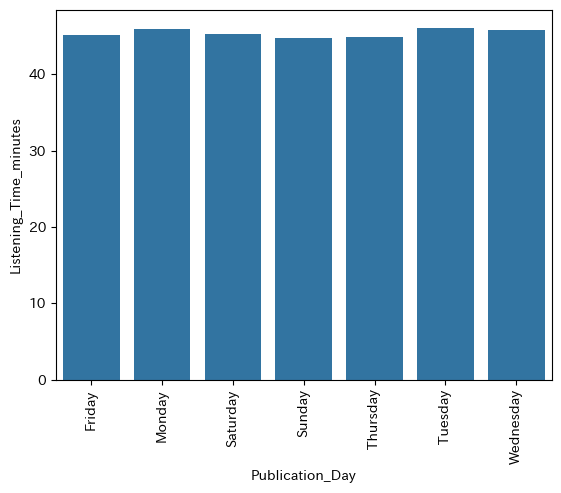

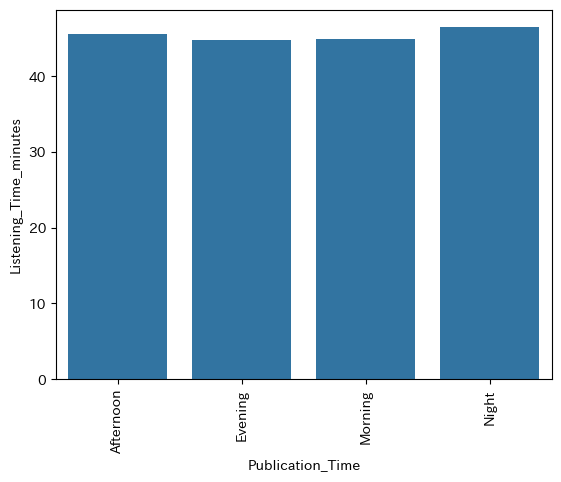

In [6]:
def bar(col, df):
    sns.barplot(df_train.groupby(col)['Listening_Time_minutes'].mean().sort_index())
    plt.xticks(rotation=90)
    plt.show()

bar('Number_of_Ads', df_train)
bar('Episode_Sentiment', df_train)
bar('Publication_Day', df_train)
bar('Publication_Time', df_train)

In [18]:
df_train[df_train["Episode_Length_minutes"]<=120].groupby('Episode_Length_minutes')["Listening_Time_minutes"].mean().sort_index()

Episode_Length_minutes
0.00        9.606840
1.24      116.780000
1.48      116.770000
1.84      100.360000
2.47       62.143690
             ...    
119.95     84.023729
119.96     92.960579
119.97     97.041929
119.98     85.394105
119.99     89.587776
Name: Listening_Time_minutes, Length: 12261, dtype: float64

In [30]:
df_train

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Length_Minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,NaN
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,120.0
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,74.0
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,67.0
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058,76.0
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242,76.0
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000,31.0
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939,109.0


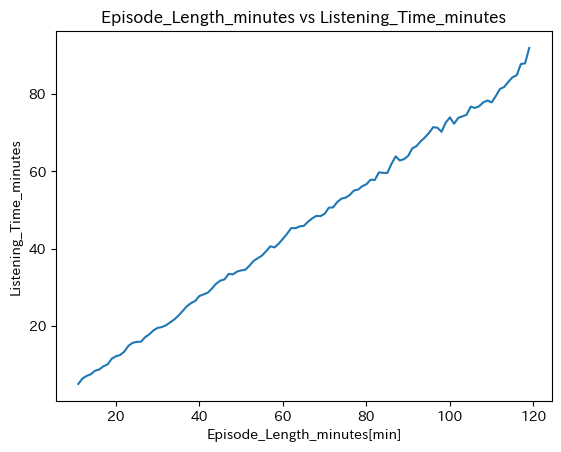

In [36]:
# Episode_Length_minutesの分布

df_train["Episode_Length_Minutes"] = round(df_train["Episode_Length_minutes"], 0)
df_episode = df_train.query("10 < Episode_Length_Minutes < 120").groupby('Episode_Length_Minutes')['Listening_Time_minutes'].mean().sort_index()
plt.plot(df_episode)
plt.xlabel("Episode_Length_minutes[min]")
plt.ylabel("Listening_Time_minutes")
plt.title("Episode_Length_minutes vs Listening_Time_minutes")
plt.show()

各エピソードの長さと試聴時間に正の線形相関がある

/var/folders/_z/nvf0bn013y300yf072lzgkgw0000gn/T/ipykernel_36223/402313075.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_date = df_train.groupby("Publication_Day")["Listening_Time_minutes"].mean().sort_values()


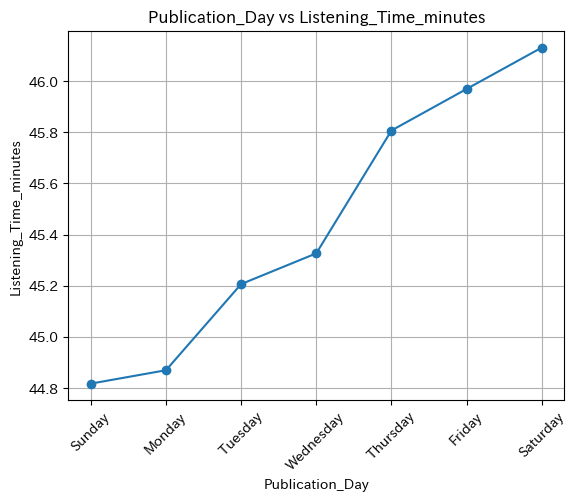

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

df_train["Publication_Day"] = pd.Categorical(
    df_train["Publication_Day"], 
    categories=weekday_order, 
    ordered=True
)
df_date = df_train.groupby("Publication_Day")["Listening_Time_minutes"].mean().sort_values()


plt.plot(weekday_order, df_date.values, marker='o')
plt.xlabel("Publication_Day")
plt.ylabel("Listening_Time_minutes")
plt.title("Publication_Day vs Listening_Time_minutes")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("./outputs/Publication_Day_vs_Listening_Time_minutes.png")
plt.show()

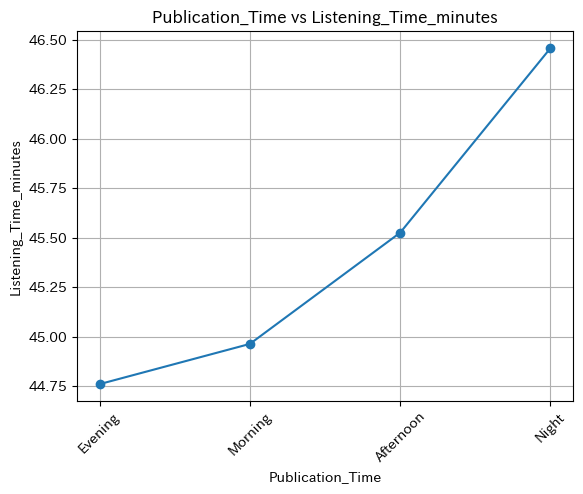

In [56]:
df_time = df_train.groupby("Publication_Time")["Listening_Time_minutes"].mean().sort_values()


plt.plot(df_time.index, df_time.values, marker='o')
plt.xlabel("Publication_Time")
plt.ylabel("Listening_Time_minutes")
plt.title("Publication_Time vs Listening_Time_minutes")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("./outputs/Publication_Time_vs_Listening_Time_minutes.png")
plt.show()

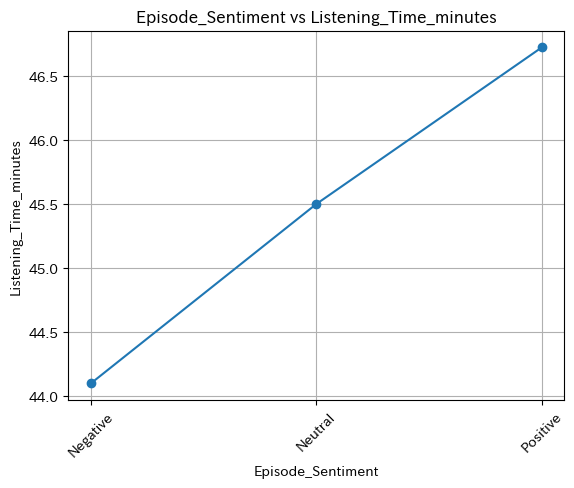

In [53]:
df_sentiment = df_train.groupby("Episode_Sentiment")["Listening_Time_minutes"].mean()


plt.plot(df_sentiment.index, df_sentiment.values, marker='o')
plt.xlabel("Episode_Sentiment")
plt.ylabel("Listening_Time_minutes")
plt.title("Episode_Sentiment vs Listening_Time_minutes")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("./outputs/Episode_Sentiment_vs_Listening_Time_minutes.png")
plt.show()

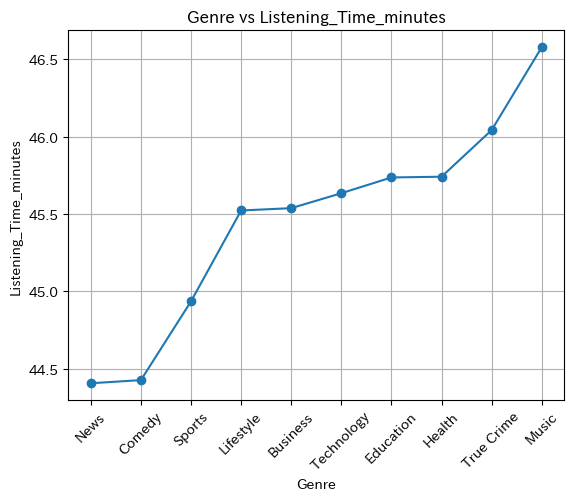

In [59]:
df_genre = df_train.groupby("Genre")["Listening_Time_minutes"].mean().sort_values()


plt.plot(df_genre.index, df_genre.values, marker='o')
plt.xlabel("Genre")
plt.ylabel("Listening_Time_minutes")
plt.title("Genre vs Listening_Time_minutes")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("./outputs/Genre_vs_Listening_Time_minutes.png")
plt.show()
